# **PROGETTO DI INTELLIGENZA ARTIFICIALE 2: Cirrhosis Patient Survival Prediction Dataset**

*Anno Accademico 24/25*

*Studentessa: Chiara Currado (2091728)*




# **1. INTRODUZIONE**

Questo progetto si propone di sviluppare un'analisi predittiva sulla sopravvivenza di pazienti affetti da **cirrosi epatica**. Il nostro obiettivo è replicare e applicare le metodologie e le tecniche di analisi dati apprese nel corso.

Utilizzeremo un dataset reale, il "**Cirrhosis Patient Survival Prediction Dataset**" dall'archivio UCI, per esplorare i dati, costruire un modello predittivo e valutarne le performance.


## Per quale scopo è stato creato il set di dati?
La cirrosi è il risultato di un danno epatico prolungato, che porta alla formazione di estese cicatrici, spesso dovute a patologie come l'epatite o il consumo cronico di alcol. I dati forniti provengono da uno studio della Mayo Clinic sulla cirrosi biliare primitiva (CBP) del fegato, condotto dal 1974 al 1984.

Nel corso di questo dieci anni, 424 pazienti con colangite biliare primitiva (CBP) si sono qualificati per lo studio randomizzato controllato con placebo che testava il farmaco D-penicillamina. Di questi, i primi 312 pazienti hanno preso parte allo studio e dispongono per lo più di dati completi. I restanti 112 pazienti non hanno aderito allo studio clinico, ma hanno accettato di registrare parametri di base e di sottoporsi al monitoraggio della sopravvivenza. Sei di questi pazienti sono diventati presto irreperibili dopo la diagnosi, lasciando dati per 106 di questi individui, oltre ai 312 che hanno preso parte allo studio randomizzato.


# Descrizione del Dataset
Il dataset sulla cirrosi è composto da **418 samples** e **19 features + target label**.

L’obiettivo è prevedere l’esito a fine follow-up (Status: deceduto vs censito), eventualmente codificato come variabile binaria (event_death).

La previsione si basa su:
- **Caratteristiche anagrafiche e terapia di baseline**:
Age (in giorni), Sex, Drug.
- **Decorso e staging della malattia**:
N_Days (giorni fino a evento/censura — da usare in analisi di sopravvivenza; da escludere per classificazione “baseline”), Stage istologico.
- **Segni clinici e profilo biochimico**:
Ascites, Hepatomegaly, Spiders, Edema e marker di funzionalità epatica: Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin.


| #  | Nome           | Descrizione                                                                    | Tipo         | Valori possibili / Intervallo                                                                 |
|----|----------------|---------------------------------------------------------------------------------|--------------|-----------------------------------------------------------------------------------------------|
| 1  | ID             | Identificativo univoco del paziente                                             | Intero       | ≥ 1                                                                                           |
| 2  | N_Days         | Giorni fino all’evento (morte/trapianto) o fine follow-up (censura)             | Numerico     | ≥ 0 (numero di giorni)                                                                        |
| 3  | Status         | Stato del paziente al termine dello studio                                      | Categoriale  | D = Deceduto, C = Censito vivo, CL = Censito per trapianto, NA = non disponibile              |
| 4  | Drug           | Trattamento ricevuto                                                            | Categoriale  | D-penicillamine, Placebo, NA                                                                  |
| 5  | Age            | Età del paziente in giorni              | Numerico     | ≥ 0 (giorni)                                                                                  |
| 6  | Sex            | Sesso del paziente                                                              | Categoriale  | F = Femmina, M = Maschio                                                                      |
| 7  | Ascites        | Presenza di ascite                                                              | Categoriale  | Y = Sì, N = No                                                                                |
| 8  | Hepatomegaly   | Presenza di epatomegalia                                                        | Categoriale  | Y = Sì, N = No                                                                                |
| 9  | Spiders        | Teleangectasie (“spiders”)                                                      | Categoriale  | Y = Sì, N = No                                                                                |
| 10 | Edema          | Edema periferico                                                                | Ordinale     | N = Assente, S = Presente ma controllato, Y = Presente                                       |
| 11 | Bilirubin      | Bilirubina totale                                                               | Numerico     | Valore continuo ≥ 0                                                                           |
| 12 | Cholesterol    | Colesterolo                                                                     | Numerico     | Valore continuo ≥ 0                                                                           |
| 13 | Albumin        | Albumina                                                                        | Numerico     | Valore continuo ≥ 0                                                                           |
| 14 | Copper         | Rame (misura clinica)                                                           | Numerico     | Valore continuo ≥ 0                                                                           |
| 15 | Alk_Phos       | Fosfatasi alcalina                                                              | Numerico     | Valore continuo ≥ 0                                                                           |
| 16 | SGOT           | AST/SGOT                                                                        | Numerico     | Valore continuo ≥ 0                                                                           |
| 17 | Tryglicerides  | Trigliceridi                                                                    | Numerico     | Valore continuo ≥ 0                                                                           |
| 18 | Platelets      | Piastrine (conteggio)                                                           | Numerico     | Valore continuo ≥ 0                                                                           |
| 19 | Prothrombin    | Tempo di protrombina                                                            | Numerico     | Valore continuo ≥ 0                                                                           |
| 20 | Stage          | Stadio istologico della malattia                                                | Ordinale     | 1–4                                                                                           |


## **2. SET-UP**

1. Import delle librerie
2. Import del Dataset come file CSV e visualizzazione


In [29]:
# Import librerie essenziali
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Questo serve per visualizzare i grafici direttamente nel notebook
%matplotlib inline

# Import moduli da sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

print('Set-up completato!')

Set-up completato!


In [30]:
# Installazione della libreria gdown (per scaricare da Google Drive)
!pip install --quiet gdown

# Scarica il file CSV dal link Google Drive
!gdown 1FH2ljA0Bb6QM0kXgWHDglCxhHf0oGu4J --output cirrhosis.csv

# Lettura del file CSV in pandas
df = pd.read_csv("cirrhosis.csv")

# Visualizzazione del dataset
pd.set_option('display.max_columns', None)
df.head(10)

Downloading...
From: https://drive.google.com/uc?id=1FH2ljA0Bb6QM0kXgWHDglCxhHf0oGu4J
To: /content/cirrhosis.csv
100% 31.9k/31.9k [00:00<00:00, 43.1MB/s]


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


# **3. ANALISI ESPLORATIVA DEI DATI (EDA)**

Ora ci occuperemo dell'**Analisi Esplorativa dei Dati (EDA - Exploratory Data Analysis)**.

L'EDA è un approccio fondamentale in ogni progetto di data science e machine learning. Il suo scopo principale è quello di:


1.   Comprendere la struttura del dataset: Quante osservazioni (righe) e quante variabili (colonne) sono presenti
2.   Identificare i tipi di dati: Quali variabili sono numeriche, quali categoriche. Questa distinzione è cruciale per applicare le tecniche di analisi e pre-processing corrette.
3.   Rilevare pattern, anomalie e valori mancanti: L'EDA ci permette di individuare eventuali problemi nei dati, come valori mancanti (nulli), errori o osservazioni atipiche (outlier), che potrebbero influenzare negativamente l'accuratezza dei modelli.
4.   Generare ipotesi: Attraverso visualizzazioni e statistiche descrittive, possiamo iniziare a formulare ipotesi sulle relazioni tra le variabili e, in particolare, tra le variabili indipendenti e la nostra variabile target (la sopravvivenza dei pazienti).


- iniziamo con l'identificaizone e la rimozione delle variabili non idonee per il task di classificazione predittiva ('ID' e 'N_Days'), per evitare **data leakage** (fuga di informazioni).

Passiamo poi all'**EDA**, con la quale otteniamo:
- la struttura del dataset (shape, columns, dtypes, info). Otteniamo un:
  - dataset composto da **418 record** e **18 variabili**
  - **feature numeriche e categoriche**
- l'analisi dei **missing values**
- l'analisi della **Variabile Target**, che con la sua composizione multimodale mostra uno **squilibrio tra le classi** 'C' (censurato, paziente sopravvissuto al termine dello studio), 'CL' (censurato a causa di trapianto di fegato) e 'D' (deceduto).
- il calcolo delle **statistiche descrittive** (media, deviazione standard, quartili, valori minimi e massimi) per tutte le variabili numeriche.







--- Fase 3: Analisi esplorativa dei dati ---

--- Eliminazione Variabili Ridondanti ---
Colonne ['ID', 'N_Days'] rimosse.

Dimensione del dataset (righe, colonne):
(418, 18)

Nomi delle colonne:
Index(['Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

Tipi di Dato
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

Informazioni generali sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeI

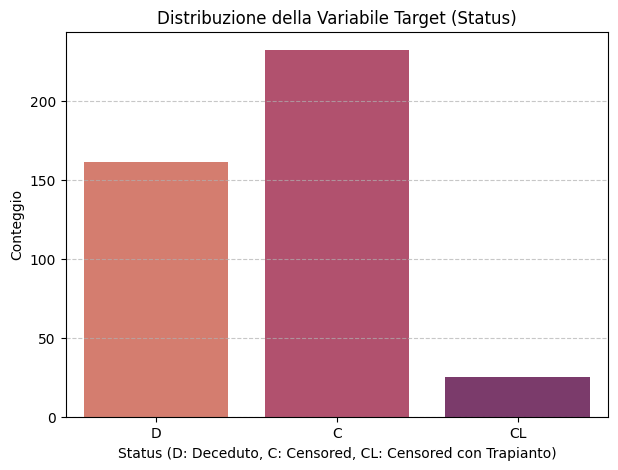


--- Analisi degli Outlier (Boxplot delle variabili numeriche) ---


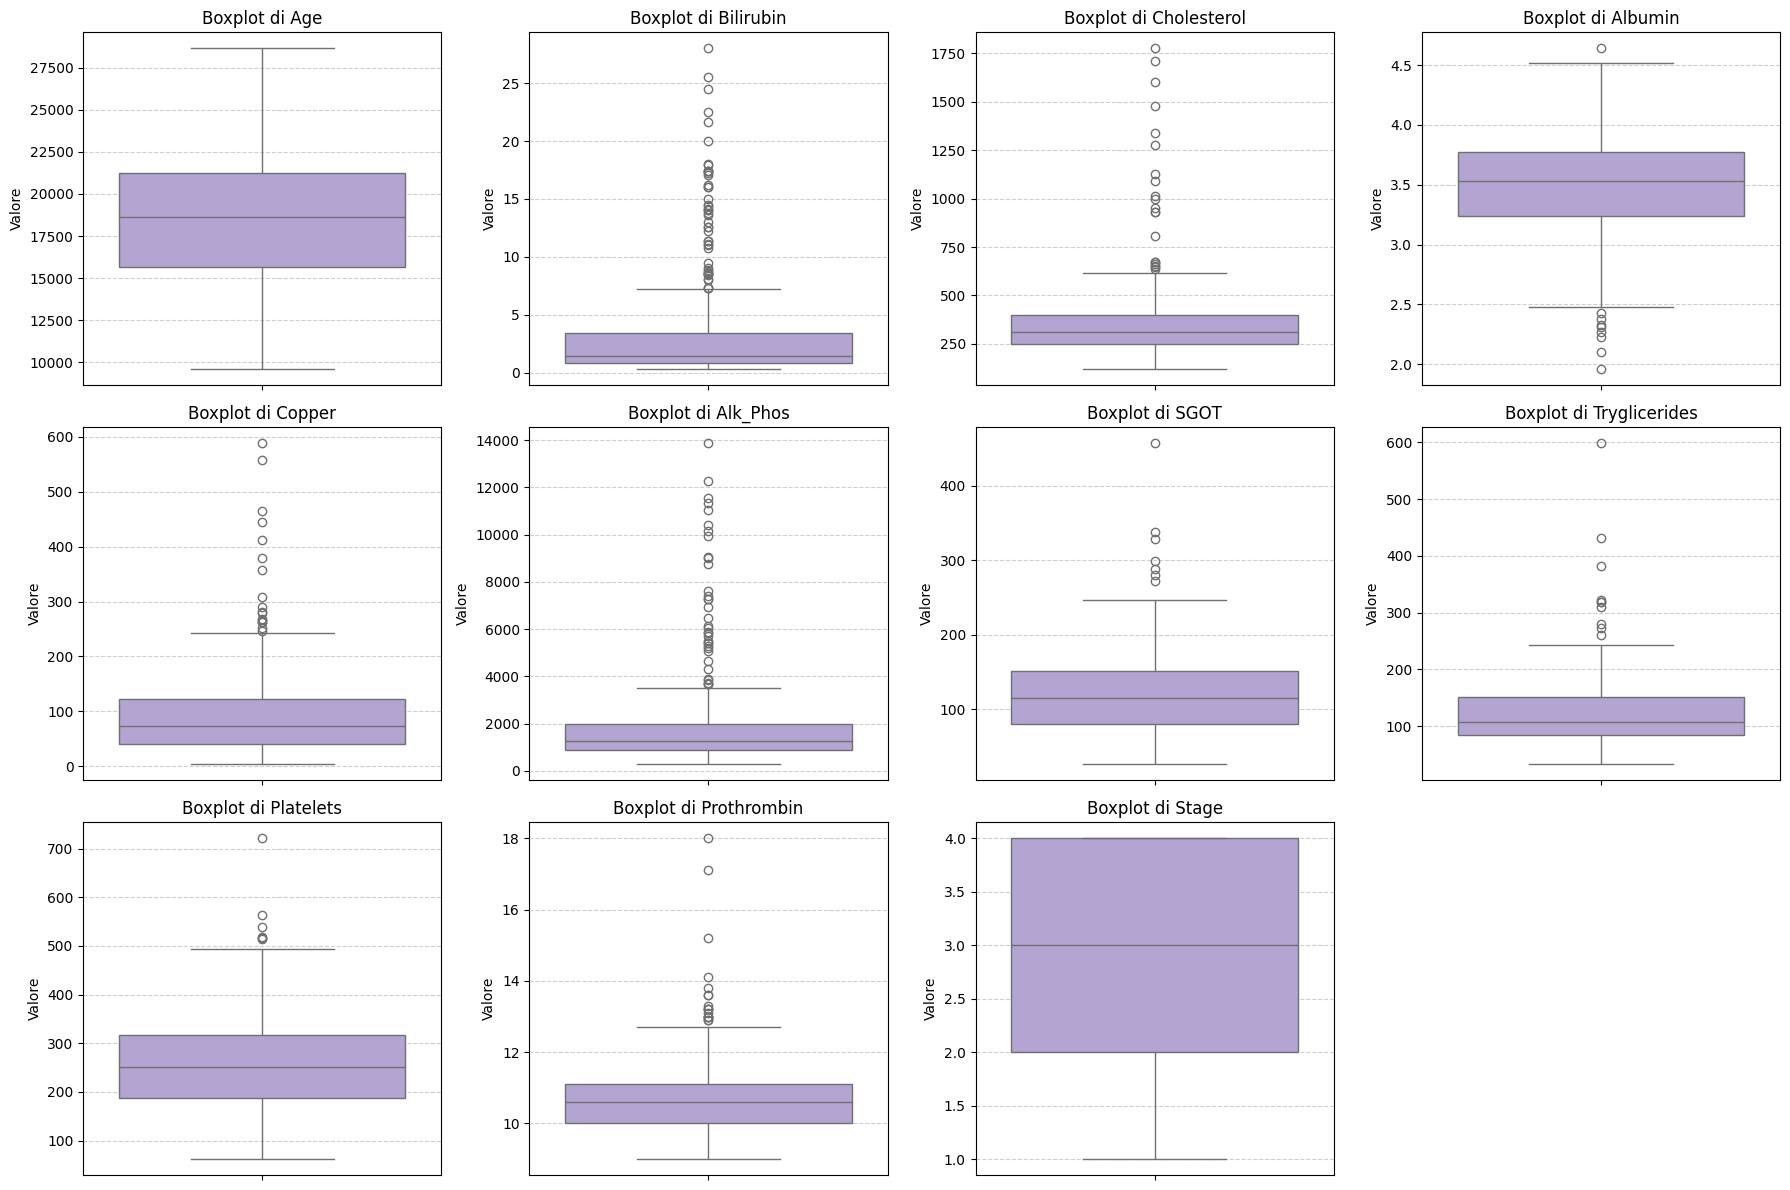

Osservazione: I boxplot mostrano la presenza di numerosi outlier in variabili come 'Bilirubin', 'Cholesterol' e 'Copper'.
Questo conferma la bontà della scelta di utilizzare la MEDIANA come metodo di imputazione per i valori mancanti.

#############################################################

Statistiche descrittive delle variabili numeriche:


,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [31]:
print("\n--- Fase 3: Analisi esplorativa dei dati ---")

# Eliminazione Variabili Ridondanti
# 'ID' è un identificatore.
# 'N_Days' indica i giorni fino all'evento, il che causa data leakage se l'obiettivo è predire 'Status'.
columns_to_drop = ["ID", "N_Days"]
df= df.drop(columns=columns_to_drop, errors='ignore')
print("\n--- Eliminazione Variabili Ridondanti ---")
print(f"Colonne {columns_to_drop} rimosse.")


#basic EDA

print("\nDimensione del dataset (righe, colonne):")
print(df.shape)

print("\nNomi delle colonne:")
print(df.columns)

print("\nTipi di Dato")
print(df.dtypes)

print("\nInformazioni generali sul dataset:")
df.info()


print("\nAnalisi dei valori mancanti:")

# Calcola il numero di valori mancanti per ogni colonna
missing_values = df.isnull().sum()

# Filtra solo le colonne con valori mancanti

# Calcola la percentuale di valori mancanti
missing_percentage = (missing_values / len(df)) * 100

# Crea un DataFrame riassuntivo per una migliore visualizzazione
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

# Ordina per percentuale decrescente
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)

print(missing_df)

# 1. Distribuzione della Variabile Target 'Status' (vs 'label' del professore)
print("\n--- Distribuzione della Variabile Target 'Status' ---")
print("Distribuzione delle Classi (conteggio):")
print(df['Status'].value_counts())
print("\nPercentuali delle Classi (%):")
print(df['Status'].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 5))
sns.countplot(x='Status', data=df, palette='flare', hue='Status', legend=False)
plt.title('Distribuzione della Variabile Target (Status)')
plt.xlabel('Status (D: Deceduto, C: Censored, CL: Censored con Trapianto)')
plt.ylabel('Conteggio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



print("\n--- Analisi degli Outlier (Boxplot delle variabili numeriche) ---")

numeric_cols_for_box = df.select_dtypes(include=[np.number]).columns.tolist()

# Creiamo una griglia di subplot per visualizzare ogni variabile singolarmente
n_cols = 4
n_rows = (len(numeric_cols_for_box) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_for_box):
    sns.boxplot(y=df[col], ax=axes[i], color='#B19CD9')
    axes[i].set_title(f'Boxplot di {col}')
    axes[i].set_ylabel('Valore')
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

# Rimuoviamo eventuali subplot vuoti nella griglia
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Breve commento da aggiungere alla relazione testuale:
print("Osservazione: I boxplot mostrano la presenza di numerosi outlier in variabili come 'Bilirubin', 'Cholesterol' e 'Copper'.")
print("Questo conferma la bontà della scelta di utilizzare la MEDIANA come metodo di imputazione per i valori mancanti.")


print('\n#############################################################')
print("\nStatistiche descrittive delle variabili numeriche:")
df.describe()


Per investigare le interdipendenze tra le variabili quantitative, generiamo una **matrice di correlazione**, che ci permette di quantificare la forza e la direzione delle relazioni lineari tra tutte le coppie di feature numeriche.

A complemento di ciò, è stato prodotto un **pairplot** per esaminare visivamente sia le distribuzioni di ogni singola variabile numerica (sulla diagonale del grafico) sia le relazioni bivariate tra di esse (tramite grafici a dispersione). Questa analisi visuale ha fornito insight qualitativi sulla struttura dei dati, evidenziando pattern, cluster o possibili relazioni non lineari che non sarebbero emersi dalla sola matrice di correlazione.


--- Matrice di Correlazione ---


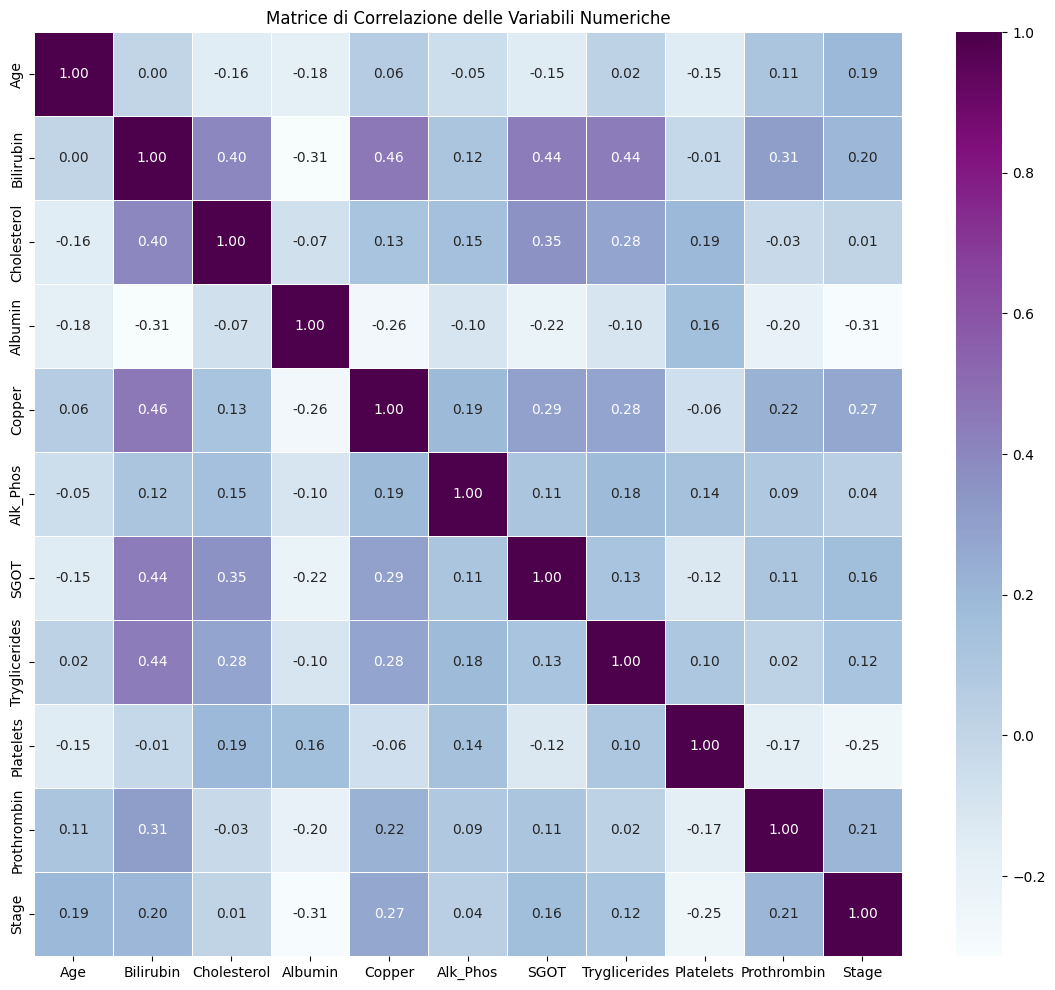


--- Pairplot delle Variabili Numeriche ---


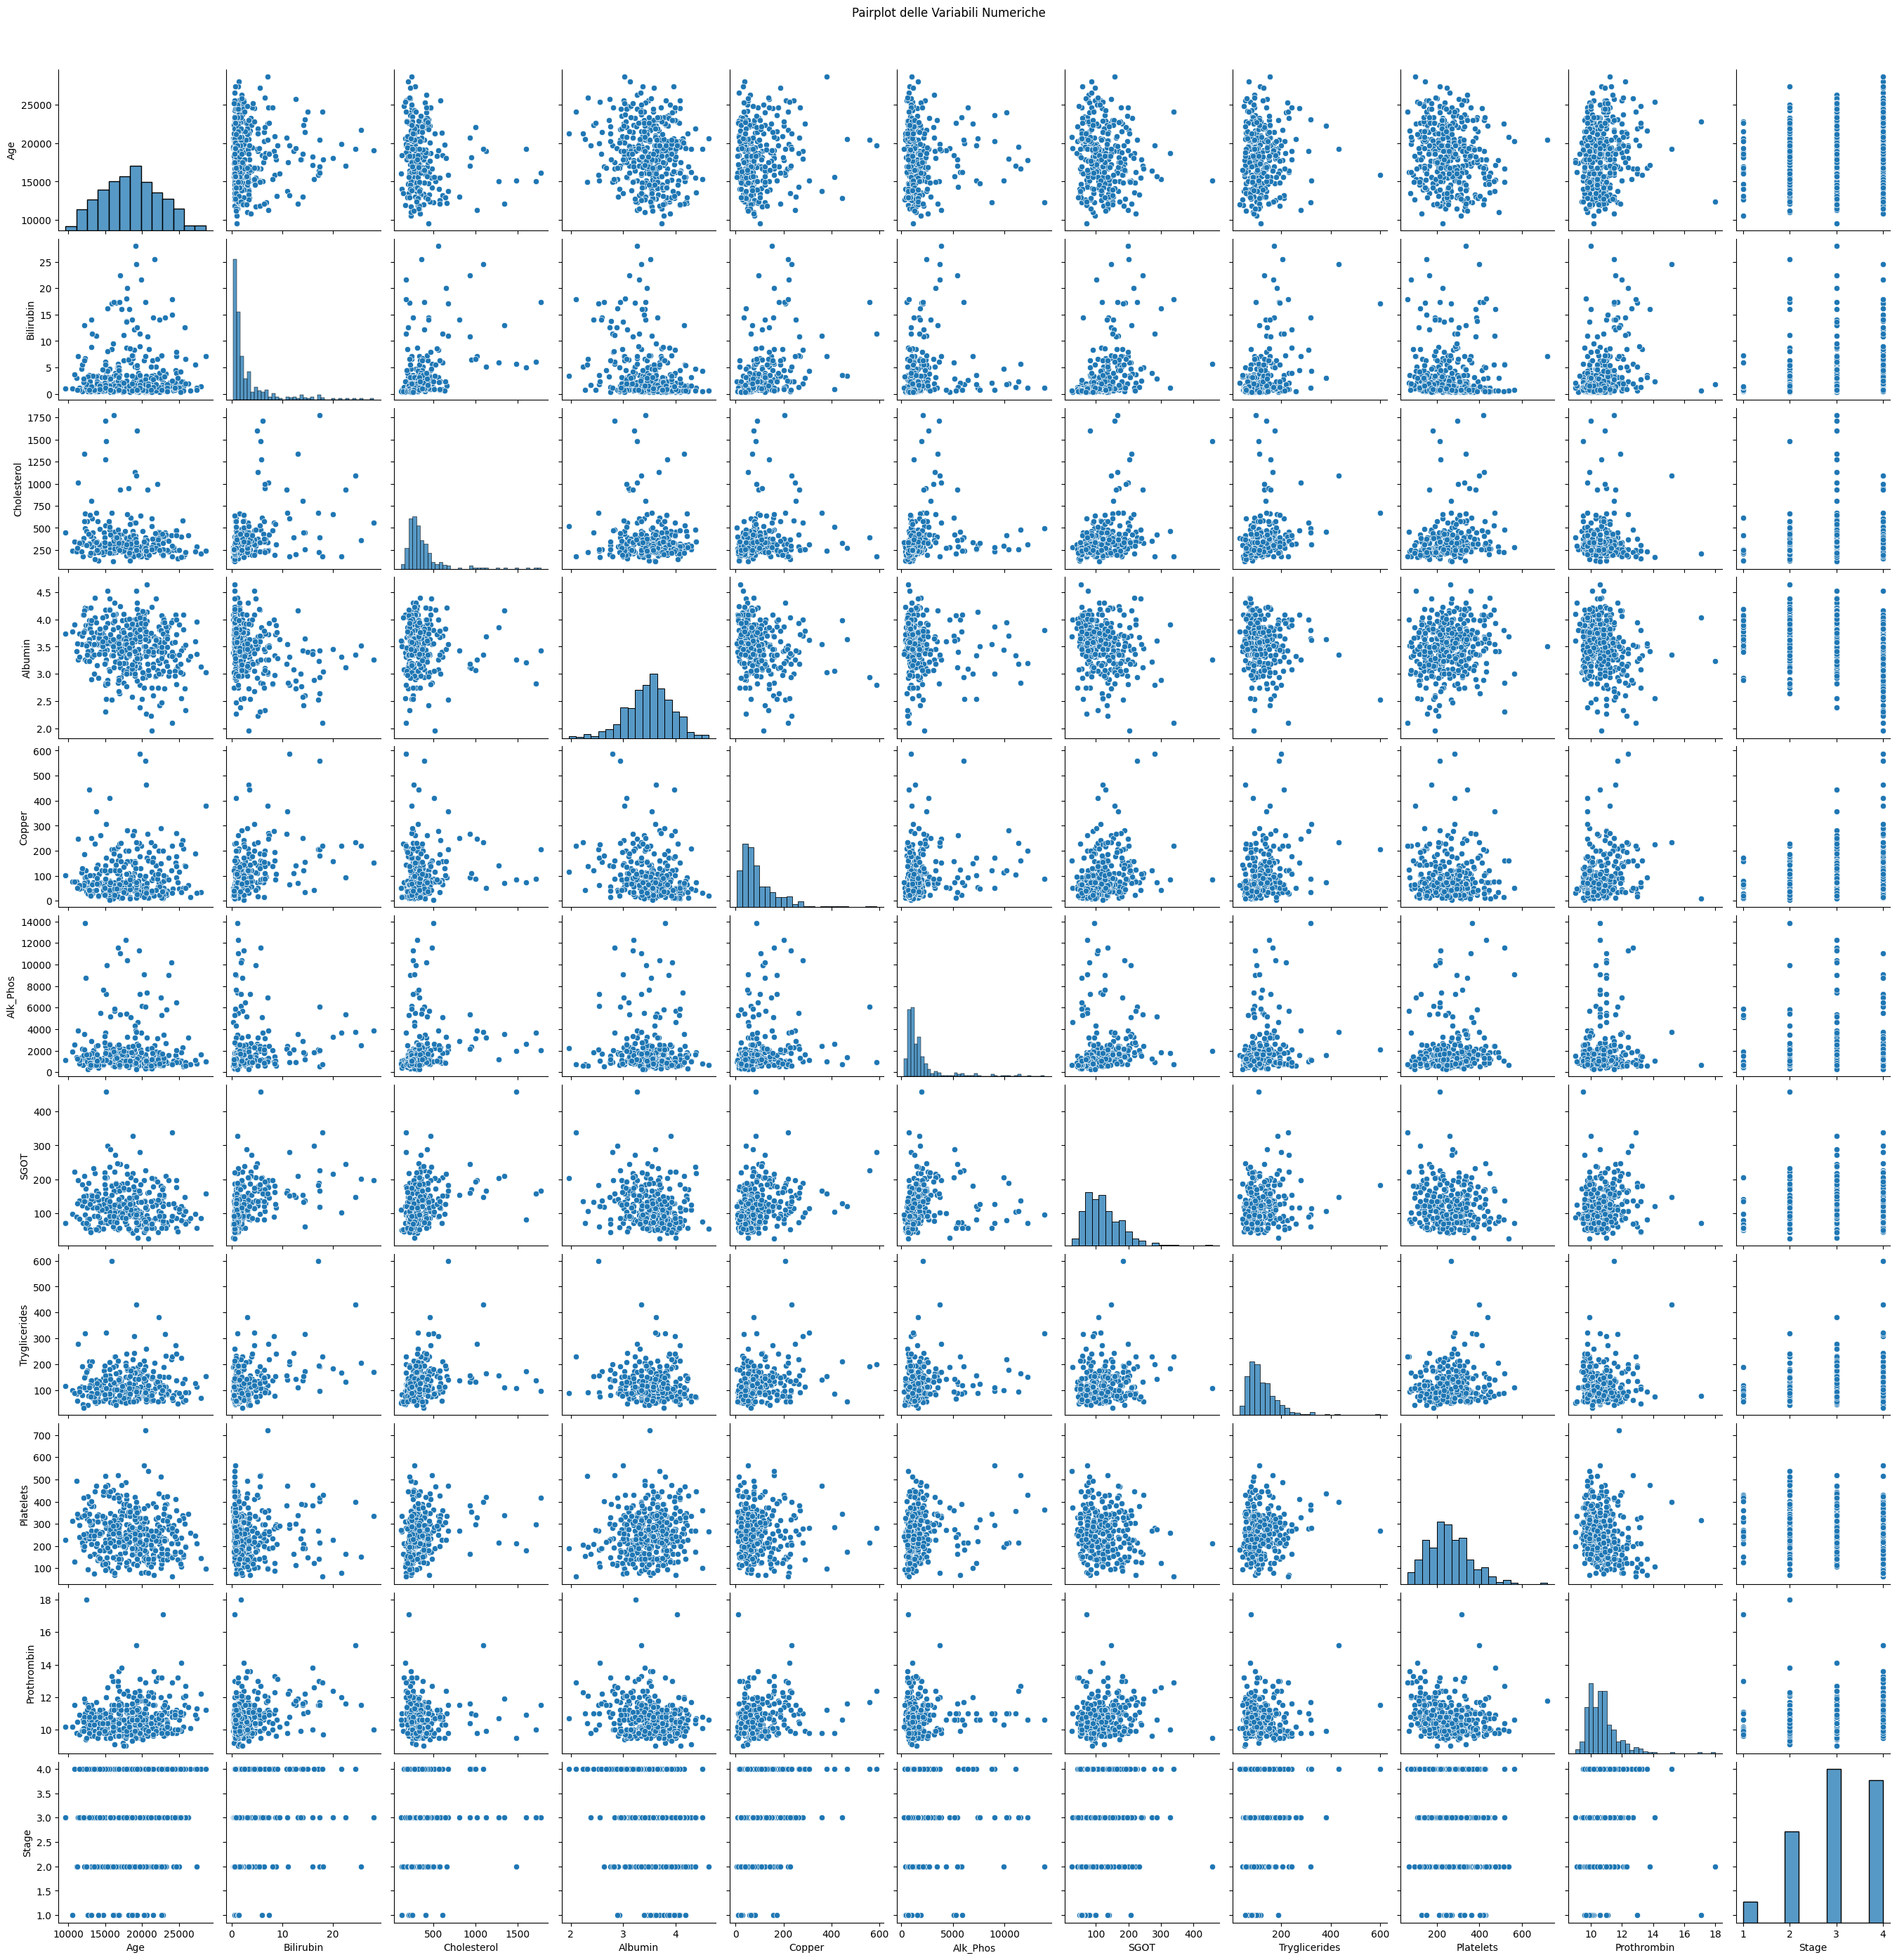

In [32]:
# 4. Matrice di Correlazione e Pairplot
print("\n--- Matrice di Correlazione ---")
# Identifichiamo le colonne numeriche attuali dopo l'imputazione
current_numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(14, 12))
sns.heatmap(df[current_numeric_cols].corr(), annot=True, cmap='BuPu', fmt=".2f", linewidths=.5)
plt.title('Matrice di Correlazione delle Variabili Numeriche')
plt.show()

print("\n--- Pairplot delle Variabili Numeriche ---")
sns.pairplot(df[current_numeric_cols])
plt.suptitle('Pairplot delle Variabili Numeriche', y=1.02)
plt.show()




--- Visualizzazione delle Distribuzioni delle Variabili Categoriche ---


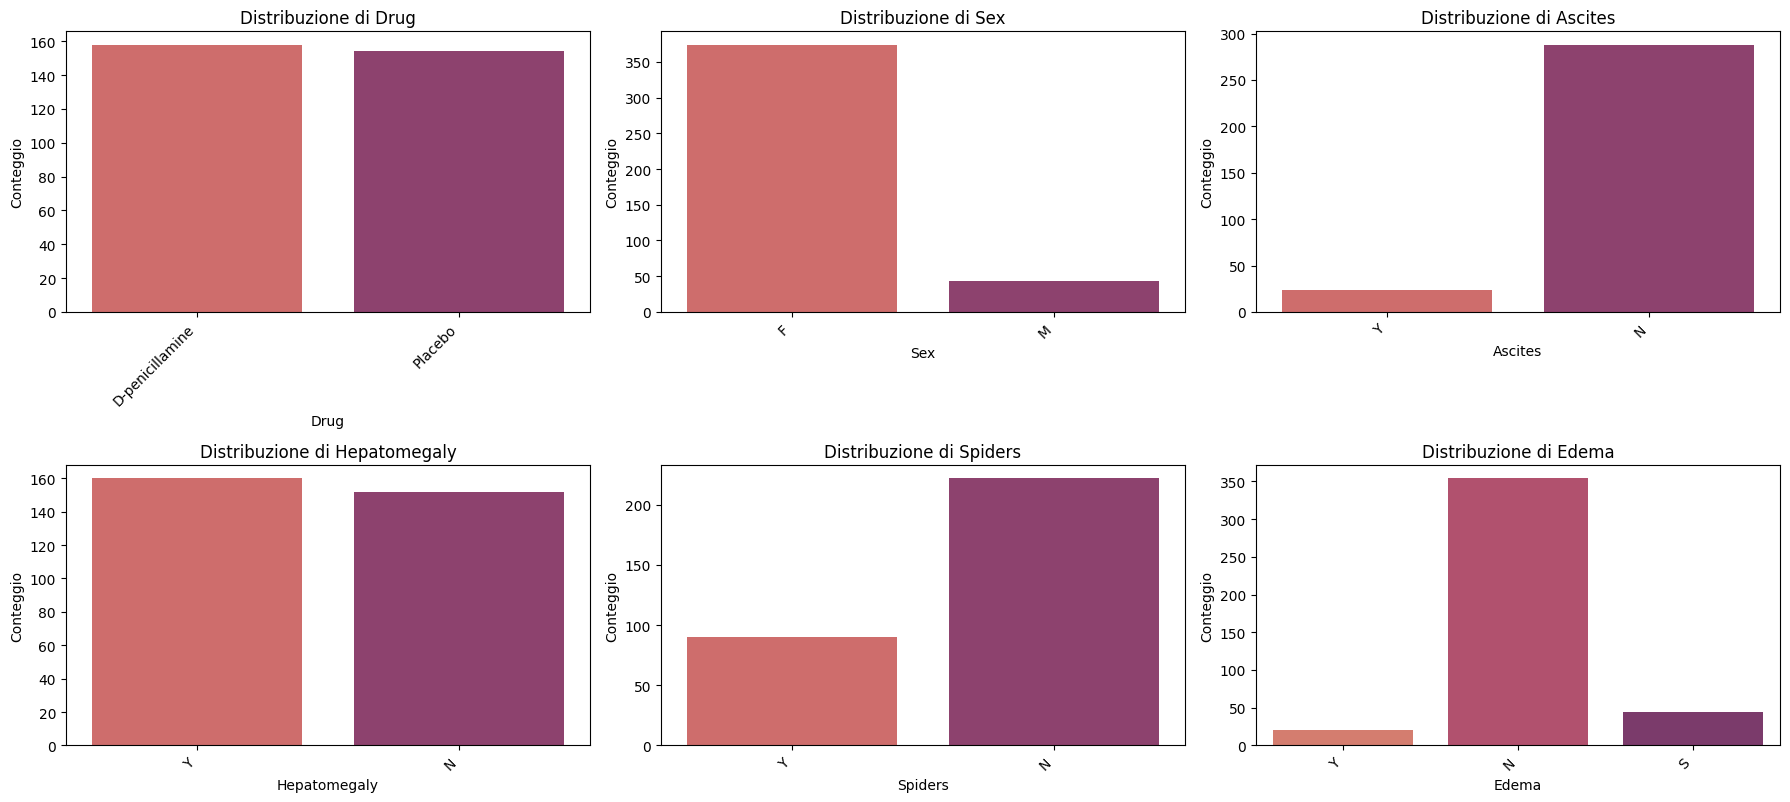


--- Analisi delle Frequenze (output testuale) ---

Colonna 'Drug':
Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64
------------------------------

Colonna 'Sex':
Sex
F    374
M     44
Name: count, dtype: int64
------------------------------

Colonna 'Ascites':
Ascites
N    288
Y     24
Name: count, dtype: int64
------------------------------

Colonna 'Hepatomegaly':
Hepatomegaly
Y    160
N    152
Name: count, dtype: int64
------------------------------

Colonna 'Spiders':
Spiders
N    222
Y     90
Name: count, dtype: int64
------------------------------

Colonna 'Edema':
Edema
N    354
S     44
Y     20
Name: count, dtype: int64
------------------------------


In [33]:
print("\n--- Visualizzazione delle Distribuzioni delle Variabili Categoriche ---")


original_categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

plt.figure(figsize=(18, 12)) # Dimensione complessiva della figura

for i, col in enumerate(original_categorical_cols):
    plt.subplot(3, 3, i + 1) # Griglia 3 righe, 3 colonne per i subplot
    sns.countplot(data=df, x=col, palette='flare', hue=col, legend=False) # 'hue=col' e 'legend=False' per un colore diverso per barra e senza legenda ridondante
    plt.title(f'Distribuzione di {col}')
    plt.xlabel(col)
    plt.ylabel('Conteggio')
    plt.xticks(rotation=45, ha='right') # Ruota le etichette per leggibilità

plt.tight_layout() # Ottimizza la spaziatura tra i subplot
plt.show() # Mostra i grafici

print("\n--- Analisi delle Frequenze (output testuale) ---")
for col in original_categorical_cols:
    print(f"\nColonna '{col}':")
    print(df[col].value_counts())
    print("-" * 30)

# **4. Pre-processing e preparazione dei dati per il modeling**





Una volta visti i valori mancanti per ogni feature, decidiamo di trattarli attraverso l'**imputazione**, ovvero sostituendo i valori mancanti con un valore stimato.

Usiamo la seguente strategia di imputazione:

- **Per le variabili numeriche con valori mancanti (Tryglicerides, Cholesterol, Copper, Alk_Phos, SGOT, Platelets, Prothrombin, Stage)**:
Imputeremo con la **mediana**. La mediana è preferibile alla media quando la distribuzione dei dati potrebbe essere skew (asimmetrica) o in presenza di outlier, poiché è meno sensibile ai valori estremi.
- **Per le variabili categoriche con valori mancanti (Drug, Spiders, Hepatomegaly, Ascites)**:
Imputeremo con la **moda** (il valore più frequente). Questa è la scelta standard per le variabili categoriche.

In [34]:
print("\n--- Fase 4: Pre-processing e parazione dei Dati per il Modeling ---")

print("\n--- Gestione Valori Mancanti (Imputazione) ---")

# Identifichiamo colonne numeriche e categoriche con valori mancanti
numerical_cols_with_missing = missing_df.index[df[missing_df.index].dtypes != 'object'].tolist()
categorical_cols_with_missing = missing_df.index[df[missing_df.index].dtypes == 'object'].tolist()

print(f"Colonne numeriche con valori mancanti da imputare con la mediana: {numerical_cols_with_missing}")
print(f"Colonne categoriche con valori mancanti da imputare con la moda: {categorical_cols_with_missing}")

# Imputazione con la mediana per le colonne numeriche
for col in numerical_cols_with_missing:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val) # Senza inplace=True e riassegnando
    print(f"Valori mancanti nella colonna '{col}' imputati con la mediana ({median_val}).")

# Imputazione con la moda per le colonne categoriche
for col in categorical_cols_with_missing:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val) # Senza inplace=True e riassegnando
    print(f"Valori mancanti nella colonna '{col}' imputati con la moda ('{mode_val}').")

# Verifichiamo che non ci siano più valori mancanti
print("\nVerifica finale dei valori mancanti dopo l'imputazione:")
print(df.isnull().sum().sum())


--- Fase 4: Pre-processing e parazione dei Dati per il Modeling ---

--- Gestione Valori Mancanti (Imputazione) ---
Colonne numeriche con valori mancanti da imputare con la mediana: ['Tryglicerides', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Platelets', 'Stage', 'Prothrombin', 'Age', 'Bilirubin', 'Albumin']
Colonne categoriche con valori mancanti da imputare con la moda: ['Drug', 'Hepatomegaly', 'Spiders', 'Ascites', 'Status', 'Edema', 'Sex']
Valori mancanti nella colonna 'Tryglicerides' imputati con la mediana (108.0).
Valori mancanti nella colonna 'Cholesterol' imputati con la mediana (309.5).
Valori mancanti nella colonna 'Copper' imputati con la mediana (73.0).
Valori mancanti nella colonna 'Alk_Phos' imputati con la mediana (1259.0).
Valori mancanti nella colonna 'SGOT' imputati con la mediana (114.7).
Valori mancanti nella colonna 'Platelets' imputati con la mediana (251.0).
Valori mancanti nella colonna 'Stage' imputati con la mediana (3.0).
Valori mancanti nella colonna 'P

Analizziamo i valori:

- **Status**: Ha tre categorie: C (Censored - paziente vivo o trapiantato), D (Dead - paziente deceduto), CL (Censored due to Liver Transplant - paziente trapiantato e quindi "sopravvissuto" in un certo senso).
Per la previsione della sopravvivenza, tratteremo **D** come l'evento di interesse (**decesso = 1**) e **C** e **CL** come non-evento (**sopravvivenza o censor = 0**). Quindi, Status verrà mappata a 0 (C, CL) e 1 (D).
- **Drug**: Binaria (D-penicillamine, Placebo).
- **Sex**: Binaria (F, M).
- **Ascites**: Binaria (N, Y).
- **Hepatomegaly**: Binaria (Y, N).
- **Spiders**: Binaria (N, Y).
- **Edema**: Ha tre categorie: N (No), S (spiccato/leggero), Y (sì/marcato).

Usiamo quindi la tecnica **One-Hot Encoding**, la quale prevede che per ogni variabile con K categorie, vengano create K-1 nuove colonne binarie.

In [35]:
print("\n--- Codifica delle Variabili Categoriche ---")

# 1. Codifica della variabile target 'Status'
# Mappiamo 'D' (Deceduto) a 1, e 'C' (Censored) e 'CL' (Censored, trapianto di fegato) a 0.
# Questo ci permette di modellare la probabilità di decesso.
df['Status_Encoded'] = df['Status'].map({'D': 1, 'C': 0, 'CL': 0})

# Verifichiamo la distribuzione della nuova variabile target
print("\nDistribuzione della variabile target 'Status_Encoded':")
print(df['Status_Encoded'].value_counts())

# Rimuoviamo la colonna 'Status' originale
df = df.drop('Status', axis=1)

# Rinominiamo la colonna 'Status_Encoded' a 'Status' per chiarezza nel modeling successivo
df = df.rename(columns={'Status_Encoded': 'Status'})

# 2. Applicazione dell'One-Hot Encoding per le altre variabili categoriche predittive

# Lista delle colonne categoriche rimanenti che diventeranno feature
# Exclude 'ID' perché non è una feature predittiva
cols_to_onehot = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

print(f"\nColonne su cui applicare One-Hot Encoding: {cols_to_onehot}")

# Applica One-Hot Encoding. drop_first=True evita la multicollinearità
# e crea K-1 colonne per K categorie, una pratica comune.
df = pd.get_dummies(df, columns=cols_to_onehot, drop_first=True, dtype=int) # dtype=int per avere 0/1 interi

# 3. Verifichiamo i primi dati e le nuove colonne
print("\nDataset dopo la codifica (prime 5 righe):")
print(df.head())

print("\nInformazioni aggiornate del dataset dopo la codifica:")
df.info()




--- Codifica delle Variabili Categoriche ---

Distribuzione della variabile target 'Status_Encoded':
Status_Encoded
0    257
1    161
Name: count, dtype: int64

Colonne su cui applicare One-Hot Encoding: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

Dataset dopo la codifica (prime 5 righe):
     Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0  21464       14.5        261.0     2.60   156.0    1718.0  137.95   
1  20617        1.1        302.0     4.14    54.0    7394.8  113.52   
2  25594        1.4        176.0     3.48   210.0     516.0   96.10   
3  19994        1.8        244.0     2.54    64.0    6121.8   60.63   
4  13918        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  Status  Drug_Placebo  Sex_M  \
0          172.0      190.0         12.2    4.0       1             0      0   
1           88.0      221.0         10.6    3.0       0             0      0   
2           55.0      


--- Visualizzazione delle Distribuzioni di Tutte le Features ---
Features numeriche (istogrammi): ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Features binarie/categoriche (grafici a barre): ['Drug_Placebo', 'Sex_M', 'Ascites_Y', 'Hepatomegaly_Y', 'Spiders_Y', 'Edema_S', 'Edema_Y']


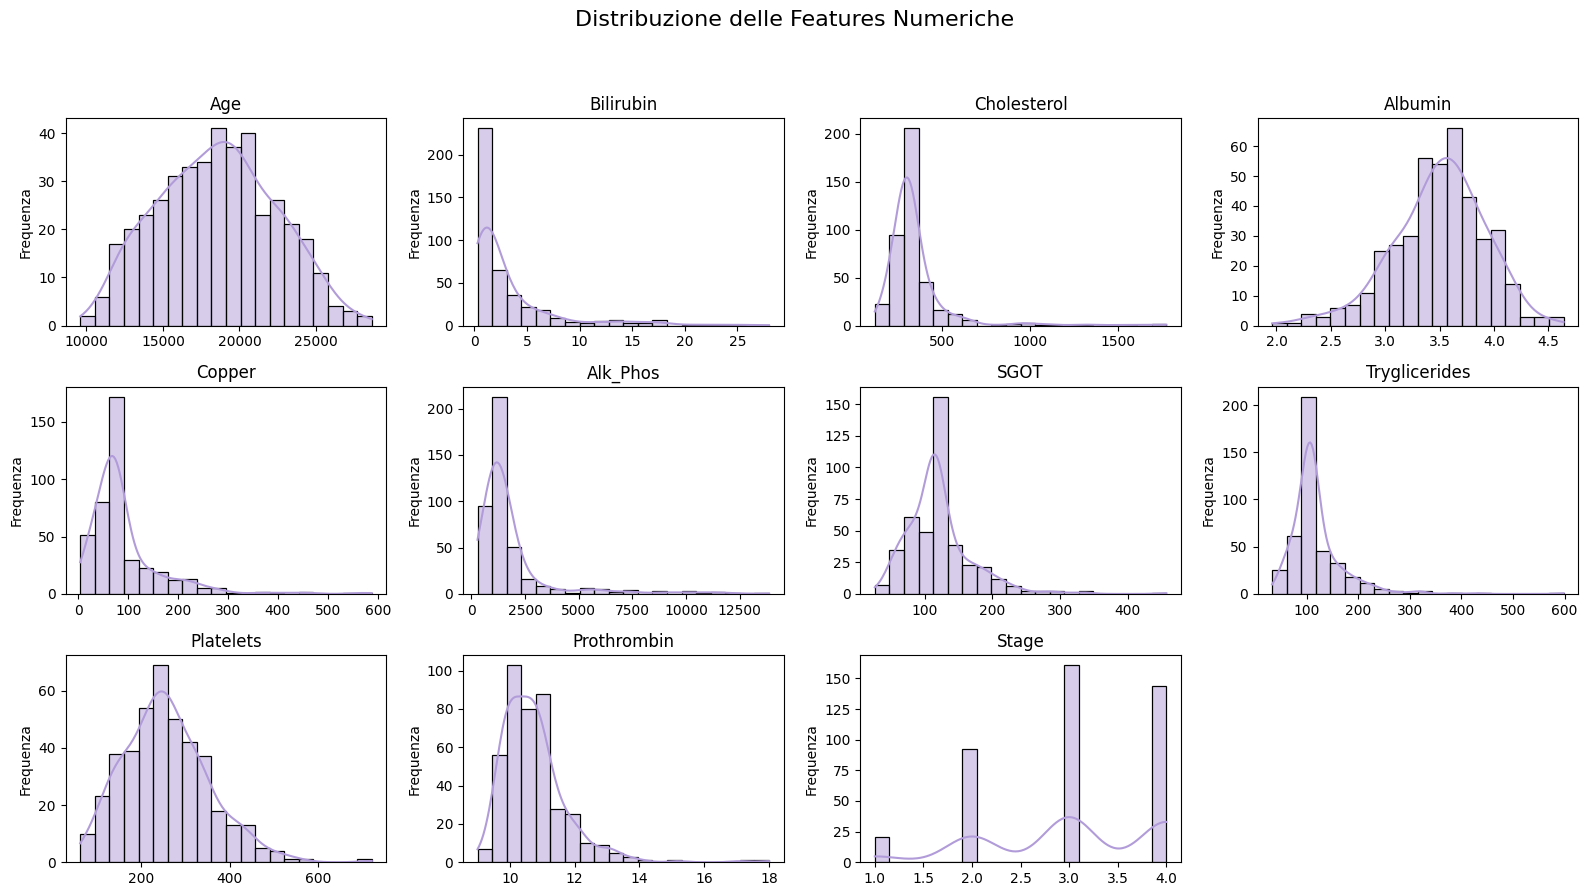

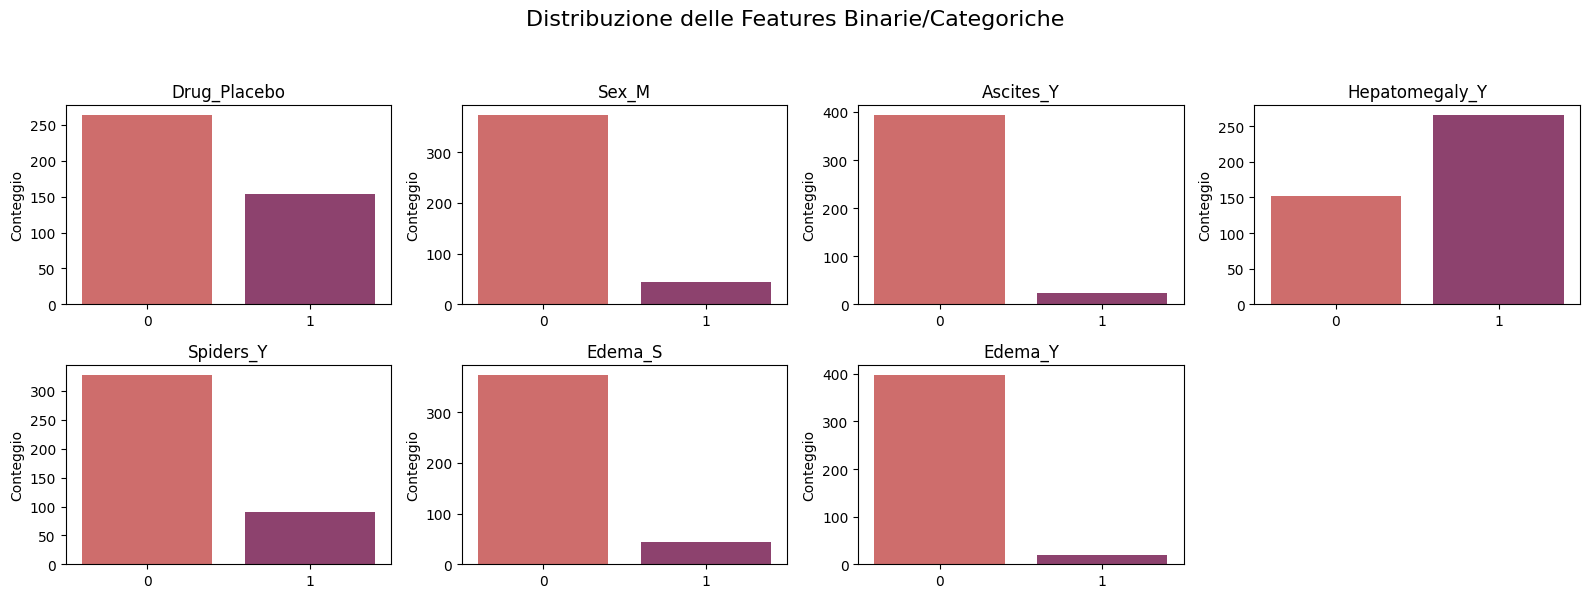

In [36]:
print("\n--- Visualizzazione delle Distribuzioni di Tutte le Features ---")

# Separiamo le colonne in numeriche e categoriche (dopo la codifica One-Hot, le categoriche saranno binarie numeriche)
# Escludiamo 'ID' che non è una feature e la variabile target 'Status' per ora.
features = df.drop(columns=['Status']).columns.tolist()

# Identifichiamo le colonne numeriche originali
# e le nuove colonne binarie/dummy create dall'one-hot encoding
numerical_features = df[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
# Qui consideriamo tutte le colonne 0/1 come categoriche binarie.
binary_features = [col for col in features if df[col].nunique() == 2 and df[col].isin([0, 1]).all()]
# Rimuoviamo le binary_features dalle numerical_features per evitare duplicazioni o visualizzazioni inappropriate.
numerical_features = [f for f in numerical_features if f not in binary_features]


print(f"Features numeriche (istogrammi): {numerical_features}")
print(f"Features binarie/categoriche (grafici a barre): {binary_features}")

# --- Grafici per Features Numeriche (Istogrammi) ---
if numerical_features:
    # Calcoliamo la dimensione della griglia: radice quadrata del numero di features, arrotondata per eccesso
    n_num_features = len(numerical_features)
    n_cols = 4 # Numero di colonne per la griglia di grafici
    n_rows = (n_num_features + n_cols - 1) // n_cols # Calcolo delle righe necessarie

    plt.figure(figsize=(n_cols * 4, n_rows * 3)) # Dimensione della figura in base alla griglia
    plt.suptitle('Distribuzione delle Features Numeriche', y=1.02, fontsize=16)

    for i, col in enumerate(numerical_features):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(data=df, x=col, kde=True, bins=20, color='#B19CD9') # kde=True aggiunge la stima della densità
        plt.title(f'{col}')
        plt.xlabel('') # Rimuovi etichetta X per non affollare
        plt.ylabel('Frequenza')

    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Regola layout per titolo superiore
    plt.show()
else:
    print("Nessuna feature numerica da visualizzare con istogrammi.")

# --- Grafici per Features Binarie/Categoriche (Count Plots) ---
if binary_features:
    n_bin_features = len(binary_features)
    n_cols = 4 # Numero di colonne per la griglia
    n_rows = (n_bin_features + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 4, n_rows * 3))
    plt.suptitle('Distribuzione delle Features Binarie/Categoriche', y=1.02, fontsize=16)

    for i, col in enumerate(binary_features):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.countplot(data=df, x=col, palette='flare', hue=col, legend=False)
        plt.title(f'{col}')
        plt.xlabel('')
        plt.ylabel('Conteggio')
        plt.xticks(rotation=0) # Non ruotare per 0/1

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()
else:
    print("Nessuna feature binaria/categorica da visualizzare con grafici a barre.")





Una volta trasformate le features categoriche in bianarie, con il **One-Hot Encoding**, attraverso questi grafici e istogrammi abbiamo mostrato in modo chiaro e intuitivo la distribuzione delle features, anche quelle numeriche, per le quali l'**asse X** (Orizzontale) rappresenta le diverse categorie della features (e il range di valori che la feature assume neel caso delle variabili numeriche), mentre l'**asse Y** (Verticale) rappresenta il conteggio delle osservazioni per ciascuna categoria, con l'altezza della barra che indica quanti pazienti rientrano in essa.

## Divisione del Dataset in Training e Test Set
È una pratica standard e fondamentale nel Machine Learning dividere il dataset in due parti:

- **Training Set**: Utilizzato per addestrare il modello. Il modello "impara" dai pattern presenti in questi dati.
- **Test Set**: Utilizzato per valutare le prestazioni del modello su dati che non ha mai "visto" durante l'addestramento. Questo ci dà una stima più realistica di come il modello si comporterà su dati nuovi e non noti.
Divideremo il dataset in un rapporto 80% per il training e 20% per il test, una divisione comune e bilanciata. Useremo stratify per assicurarci che la proporzione della variabile target (Status) sia mantenuta sia nel training che nel test set, il che è importante dato che la sopravvivenza potrebbe essere sbilanciata.

In [37]:
print("\n--- 4.1: Divisione del Dataset in Training e Test Set ---")

from sklearn.model_selection import train_test_split

# Definiamo le features (X) e la variabile target (y)
# Escludiamo 'ID' perché è solo un identificatore e non una feature predittiva.
X = df.drop(columns=['Status']) # Tutte le colonne tranne ID e Status
y = df['Status'] # La nostra variabile target codificata

print(f"Dimensioni del dataset features (X): {X.shape}")
print(f"Dimensioni del dataset target (y): {y.shape}")

# Divisione del dataset
# test_size=0.20 indica che il 20% dei dati andrà nel test set.
# random_state garantisce che la divisione sia riproducibile.
# stratify=y assicura che la proporzione delle classi di 'Status' sia la stessa in train e test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print(f"\nDimensioni del Training Set (X_train): {X_train.shape}")
print(f"Dimensioni del Test Set (X_test): {X_test.shape}")
print(f"Dimensioni del Training Set (y_train): {y_train.shape}")
print(f"Dimensioni del Test Set (y_test): {y_test.shape}")

print("\nDistribuzione della variabile target nel Training Set:")
print(y_train.value_counts(normalize=True)) # normalize=True mostra le percentuali

print("\nDistribuzione della variabile target nel Test Set:")
print(y_test.value_counts(normalize=True))


--- 4.1: Divisione del Dataset in Training e Test Set ---
Dimensioni del dataset features (X): (418, 18)
Dimensioni del dataset target (y): (418,)

Dimensioni del Training Set (X_train): (334, 18)
Dimensioni del Test Set (X_test): (84, 18)
Dimensioni del Training Set (y_train): (334,)
Dimensioni del Test Set (y_test): (84,)

Distribuzione della variabile target nel Training Set:
Status
0    0.613772
1    0.386228
Name: proportion, dtype: float64

Distribuzione della variabile target nel Test Set:
Status
0    0.619048
1    0.380952
Name: proportion, dtype: float64


A seguito della codifica, il dataset presentava feature numeriche con scale e range di valori molto eterogenei (es. Age in decine di migliaia, Bilirubin in singole unità).

Per prevenire che le variabili con magnitudo maggiore potessero dominare indebitamente la funzione obiettivo di algoritmi sensibili alla scala, come la Regressione Logistica con regolarizzazione, abbiamo implementato una fase di **standardizzazione**, con la tecnica **StandardScaler** di Scikit-learn, che trasforma ogni feature in modo che abbia una **media** pari a **zero** e una **deviazione standard** pari a **uno** (Z-score normalization)..

Per garantire una valutazione imparziale del modello, i parametri di scaling (media e deviazione standard) sono stati calcolati (fit) esclusivamente sul set di addestramento. La trasformazione risultante è stata poi applicata (transform) sia al set di addestramento sia al set di test. Questo approccio assicura che nessuna informazione proveniente dal set di test "contamini" la fase di pre-elaborazione, preservando l'integrità del test set come una vera simulazione di dati nuovi e non visti.

In [38]:
print("\n--- 4.2: Standardizzazione delle Features Numeriche ---")

from sklearn.preprocessing import StandardScaler

# Identifichiamo nuovamente le features numeriche che richiedono standardizzazione.
# Escludiamo le colonne binarie (0/1) che non necessitano di standardizzazione,
# in quanto già rappresentano categorie discrete.
numerical_features_to_scale = [col for col in X_train.columns if X_train[col].nunique() > 2] # Le colonne con più di 2 valori unici

print(f"Features numeriche da standardizzare: {numerical_features_to_scale}")

if numerical_features_to_scale:
    # Inizializziamo lo StandardScaler
    scaler = StandardScaler()

    # Applichiamo lo scaler SOLO sul training set
    # Il .fit() calcola media e deviazione standard sul X_train
    # Il .transform() applica la trasformazione
    X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
    X_train_scaled = X_train


    # Applichiamo la stessa trasformazione (con le medie/std calcolate sul training) al test set
    X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])
    X_test_scaled = X_test

    print("\nDati numerici standardizzati con successo.")
    print("\nPrime 5 righe di X_train dopo la standardizzazione (solo colonne numeriche):")
    print(X_train[numerical_features_to_scale].head())
    print("\nStatistiche descrittive di X_train dopo la standardizzazione (solo colonne numeriche):")
    print(X_train[numerical_features_to_scale].describe().loc[['mean', 'std']]) # Mostra media e std, che dovrebbero essere circa 0 e 1
else:
    print("Nessuna feature numerica continua identificata per la standardizzazione.")


--- 4.2: Standardizzazione delle Features Numeriche ---
Features numeriche da standardizzare: ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

Dati numerici standardizzati con successo.

Prime 5 righe di X_train dopo la standardizzazione (solo colonne numeriche):
          Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
214 -0.903871   0.654298     4.587284  0.857892  0.619180 -0.318703  1.670029   
152 -0.102678  -0.625906    -0.665216  0.857892 -0.311403 -0.719859 -1.312104   
3    0.385163  -0.317709    -0.531300 -2.329354 -0.362394  2.308205 -1.184241   
300 -0.520047  -0.507369     0.207720  0.176648 -0.540862 -0.263684 -0.916290   
394 -1.394833  -0.412539    -0.206429  1.174183 -0.247665 -0.289324 -0.100613   

     Tryglicerides  Platelets  Prothrombin     Stage  
214       0.823078  -0.403246    -0.040555 -0.027263  
152      -1.028085   0.146527     0.352067 -2.303695  


# **5. LOGISTIC REGRESSION (modello di base e miglior modello)**

Usiamo ora un modello semplice di Regressione Logistica per valutare le prestazioni di un modello di base con le metriche standard di:

- **Precision**
- **Recall**
- **F1-score**
- **Accuracy**

Per rendere l'analisi più accurata proviamo a migliorare il modello correggendo lo sbilanciamento tra classi tramite l'utilizzo del parametro class_weight = 'balanced' e implementazione di Grid Search con ricerca di iperparametri per Cross-validation.




--- Fase 5: Modeling e Valutazione ---

--- 5.1: Modello di Regressione Logistica ---


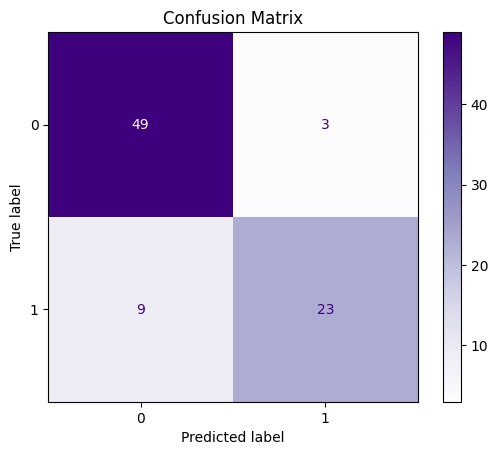


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        52
           1       0.88      0.72      0.79        32

    accuracy                           0.86        84
   macro avg       0.86      0.83      0.84        84
weighted avg       0.86      0.86      0.85        84

Accuratezza sul test set: 0.8571
Miglior parametro C trovato: {'C': 10}


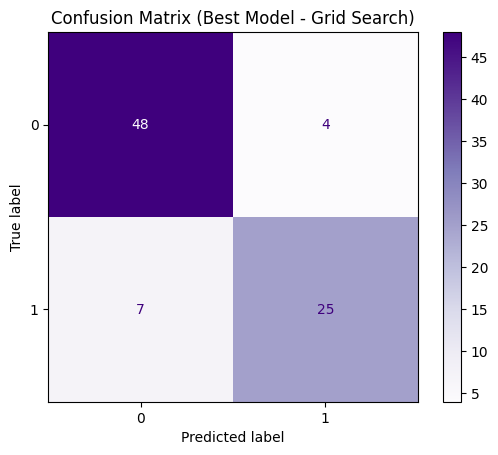

Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       205
           1       0.69      0.71      0.70       129

    accuracy                           0.77       334
   macro avg       0.75      0.76      0.76       334
weighted avg       0.77      0.77      0.77       334


Classification Report con Grid Search:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        52
           1       0.86      0.78      0.82        32

    accuracy                           0.87        84
   macro avg       0.87      0.85      0.86        84
weighted avg       0.87      0.87      0.87        84

Accuratezza sul test set (Best Model): 0.8690


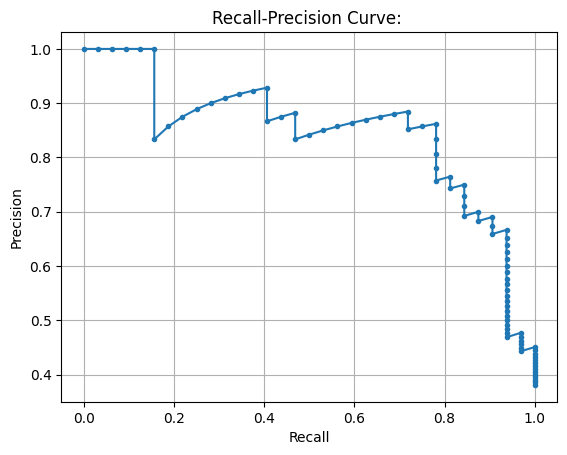

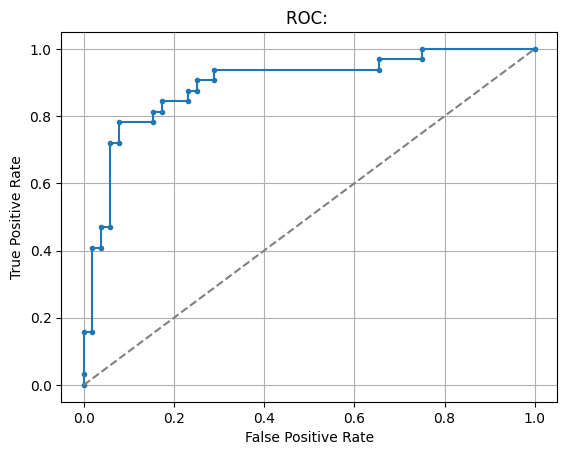

AUC:  0.8954326923076923

Verifica overfitting con curva di apprendimento...
Accuratezza del miglior modello sul training set: 0.7934
Accuratezza del miglior modello sul test set:     0.8690


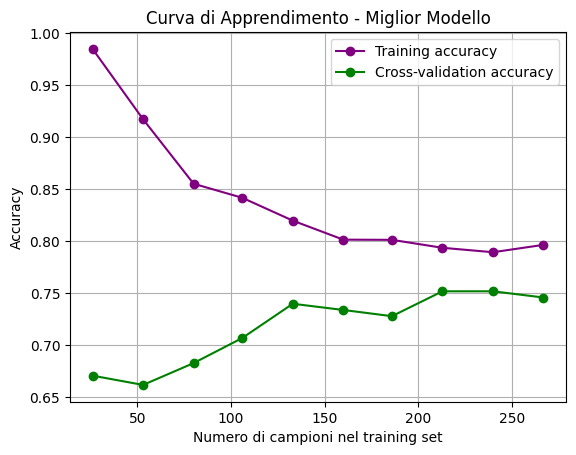

In [39]:
print("\n--- Fase 5: Modeling e Valutazione ---")
print("\n--- 5.1: Modello di Regressione Logistica ---")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_predict, learning_curve

# Creazione del modello di regressione logistica
model = LogisticRegression(C=1, max_iter=200)

# Addestramento del modello su train
model.fit(X_train_scaled, y_train)
# Predizioni sui dati di test
y_hat_te = model.predict(X_test_scaled)

# Calcolo della confusion matrix
cm = confusion_matrix(y_test, y_hat_te)
# Visualizzazione della confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap='Purples')
plt.title('Confusion Matrix')
plt.show()

# Visualizzazione metriche di classificazione
print("\nClassification Report:")
print(classification_report(y_test, y_hat_te))

accuracy = accuracy_score(y_test, y_hat_te)
print(f"Accuratezza sul test set: {accuracy:.4f}")

# Definizione griglia di parametri da esplorare
param_grid = {'C': [0.1, 1, 10, 100]}
# Creazione dell'oggetto GridSearchCV per fare la cross-validation
grid_search = GridSearchCV(
    LogisticRegression(max_iter=200, class_weight='balanced'),
    param_grid,
    cv=10,
    scoring='accuracy'
)
# GridSearchCV
grid_search.fit(X_train_scaled, y_train)
# Visualizzare il miglior parametro C trovato
print(f"Miglior parametro C trovato: {grid_search.best_params_}")

# Predizioni con il modello ottimizzato (quello con il miglior parametro C)
best_model = grid_search.best_estimator_
# Predizioni sui dati di test
y_hat_te_best = best_model.predict(X_test_scaled)


# Calcolo della confusion matrix per il modello ottimizzato
cm_best = confusion_matrix(y_test, y_hat_te_best)
ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=best_model.classes_).plot(cmap='Purples')
plt.title('Confusion Matrix (Best Model - Grid Search)')
plt.show()


# Ottieni le predizioni usando cross_val_predict con il miglior modello e cross-validation
y_pred_cv = cross_val_predict(best_model, X_train_scaled, y_train, cv=10)

# Stampa classification report basato sulle predizioni cross-validate
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cv))

#Visualizzazione classification Report per il miglior modello
print("\nClassification Report con Grid Search:")
print(classification_report(y_test, y_hat_te_best))

accuracy_best = accuracy_score(y_test, y_hat_te_best)
print(f"Accuratezza sul test set (Best Model): {accuracy_best:.4f}")

# Calcolo curva ROC-AUC per il miglior modello
roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

# Precision and Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title("Recall-Precision Curve: ")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

# ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Linea di riferimento casuale
plt.title("ROC: ")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
print ("AUC: ", auc_score)

# Analisi overfitting
print('\nVerifica overfitting con curva di apprendimento...')

# Accuratezza sul training set
train_pred = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)

print(f"Accuratezza del miglior modello sul training set: {train_accuracy:.4f}")
print(f"Accuratezza del miglior modello sul test set:     {accuracy_best:.4f}")

# Calcolo learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='purple', label='Training accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color='green', label='Cross-validation accuracy')
plt.title('Curva di Apprendimento - Miglior Modello')
plt.xlabel('Numero di campioni nel training set')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Il modello è stato dunque addeatrato (fit) sui dati di training standardizzati (X_train_scaled, y_train).

Paragonando i due modelli notiamo che:

- Accuratezza del modello base: 0.8571
- Accuratezza del miglior modello: 0.8690

Inoltre, al fine di ottenere ulteriori informazioni in merito all'apprendimento del modello sono state plottate le curve di precision-recall e ROC-AUC, ottenendo un valore di AUC di 0.8954.

Infine, per escludere la possibilità di overfitting è stata plottata una curva di apprendimento per visualizzare l'andamento delle performance del miglior modello sui dati di training e di test. Si evince che il modello generalizza bene sui dati:

- Accuratezza training set: 0.7934
- Accuratezza test set: 0.8690

Abbiamo quindi realizzato:
- **Confusion Matrix**: Mostra quanti True Positives (TP), True Negatives (TN), False Positives (FP) e False Negatives (FN) il modello ha prodotto. È fondamentale per capire gli errori.
- **Classification Report**: Fornisce un riepilogo dettagliato di precision, recall, f1-score e support per ogni classe.
- **Accuracy**: La percentuale di predizioni corrette.
- **ROC AUC Score**: Una metrica robusta per la performance di classificazione, specialmente con classi sbilanciate, che misura l'abilità del modello di distinguere tra le classi.
- **Precision-Recall Curve**: Utile quando le classi sono sbilanciate e ci interessa la performance sui positivi (come i decessi).
- **ROC Curve**: Mostra il trade-off tra True Positive Rate e False Positive Rate a varie soglie di classificazione.


# **11. CONSIDERAZIONI FINALI**

Al termine di questo studio, si riportano le considerazioni conclusive relative alle motivazioni metodologiche, ai risultati ottenuti e alle implicazioni che hanno guidato l'intero processo di analisi.

La scelta di operare sul **dataset "Cirrhosis Patient Survival Prediction"** è stata deliberata, con l'obiettivo di confrontarsi con le complessità intrinseche di un contesto clinico reale.

La decisione di impiegare primariamente un modello di **Regressione Logistica** è stata strategica, privilegiando l'interpretabilità e la robustezza rispetto alla pura performance, il che è un aspetto essenziale, se si parla di modelli utilizzabili in ambito clinico.

In conclusione, questo progetto ha dimostrato come un'analisi approfondita, che integra le fasi di pre-elaborazione, sia indispensabile in contesti medico-sanitari. Sebbene le tecniche esplorate si siano rivelate efficaci, il futuro della ricerca in questo ambito si dirige verso metodologie ancora più avanzate per la protezione dei dati, rappresentando la prossima frontiera per un'intelligenza artificiale responsabile in sanità.